In [1]:
# *********************** *******************************
# Govinda KC                                            #                      
# UTEP, Compuational Science                            #
# Last modified: 1/13/2019                              # 
# *******************************************************

## ******* Violin plot, Box plot and Histogram for Ligandnet2 ********

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [2]:
# Load report file
df = pd.read_csv('Report.csv')
df.head(2)

,uniprot,xgb_accuracy,xgb_f1_score,xgb_cohen_kappa,xgb_mcc,rf_accuracy,rf_f1_score,rf_cohen_kappa,rf_mcc,svc_accuracy,...,mlp_f1_score,mlp_cohen_kappa,mlp_mcc,train_count,test_count,actives_count,decoys_count,best_model,best_metric,best_score
0,P24530,1.00,1.000,1.0000,1.0000,0.9916,0.9916,0.9811,0.9812,0.9916,...,0.9916,0.9813,0.9815,475,119,198,396,xgb,f1_score,1.0
1,Q9UGN5,0.96,0.957,0.7289,0.7411,0.9733,0.9713,0.8193,0.8330,1.0000,...,0.9713,0.8193,0.8330,598,150,68,680,svc,f1_score,1.0


In [3]:
best_models = ['rf', 'xgb', 'svc', 'mlp']
metrics = ['Accuracy','F1_Score', 'Cohen_Kappa', 'MCC']

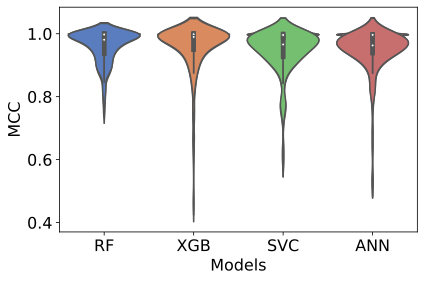

In [5]:
for i in metrics:
    score = []
    for j in best_models:
        ndf = df[df['best_model']==j]
        header = j+'_'+i.lower()
        _list = list(ndf[header])
        score.append(_list)
    models = ['RF', 'XGB', 'SVC', 'ANN']
    ax = sns.violinplot(data= (score), palette="muted",scale='width')
    ax.set_xlabel('Models')
    if i == 'f1_score' or 'cohen_kappa':
        i = i.split('_')
        i = ' '.join(i)
    ax.set_ylabel(i)
    ax.set_xticklabels(models)
    plt.rc('xtick', labelsize = 16 )
    plt.rc('ytick', labelsize = 16)
    plt.rcParams["axes.labelsize"] = 16
    plt.tight_layout()
    #     plt.show()
    plt.savefig(i,dpi=600)
        
    